In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv("pokemon.csv")

In [96]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [97]:
len(df[df["type2"].isnull()])

384

In [98]:
df1 = df[df['type2'].isnull()].loc[
    :, ['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp', 'type1']]

In [99]:
X = df1.loc[:, df1.columns != "type1"]

In [100]:
from sklearn.preprocessing import normalize

In [101]:
X_norm = normalize(X)
X_norm

array([[0.46853557, 0.39044631, 0.40606416, 0.33578383, 0.5075802 ,
        0.30454812],
       [0.47938582, 0.38950098, 0.38350866, 0.34755472, 0.47938582,
        0.34755472],
       [0.38450164, 0.4921621 , 0.36912158, 0.49985214, 0.33067141,
        0.33836145],
       ...,
       [0.14643103, 0.66146433, 0.14643103, 0.66146433, 0.1868258 ,
        0.21712188],
       [0.69641534, 0.28581208, 0.35827148, 0.28581208, 0.33411834,
        0.33411834],
       [0.5127391 , 0.3593211 , 0.43199279, 0.40776889, 0.31894794,
        0.39161963]])

In [102]:
y = df1.loc[:, df1.columns == "type1"]
y.head()

,type1
3,fire
4,fire
6,water
7,water
8,water


In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [111]:
lda = LDA(n_components=3)

In [112]:
lda.fit(X_norm, y)

LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

In [114]:
coef_df = pd.DataFrame(lda.coef_, columns = df1.columns[:-1], index = [lda.classes_])
coef_df

,sp_attack,sp_defense,attack,defense,speed,hp
bug,-2.115793,-2.600174,-1.457147,12.198789,5.230928,9.382919
dark,2.439095,-6.964872,0.644235,-5.431746,1.024351,-6.746843
dragon,-5.073986,5.038432,9.823088,-2.246976,-1.729706,-4.047883
electric,4.139151,-2.898673,-3.751011,-5.931501,3.005850,-4.677875
fairy,7.046546,11.909761,-1.179866,-0.047129,-2.137213,5.308099
fighting,-15.316817,0.698260,11.918529,-7.472612,-3.215257,-1.876444
fire,6.634318,0.735158,3.247262,-2.110664,3.139302,-0.035279
flying,9.209199,2.734715,2.006424,1.706141,10.032666,2.103722
ghost,-8.981487,-2.123672,-10.685230,-7.571606,-17.456528,-27.505949
grass,7.812508,3.300922,1.773910,7.411580,3.999790,5.400756


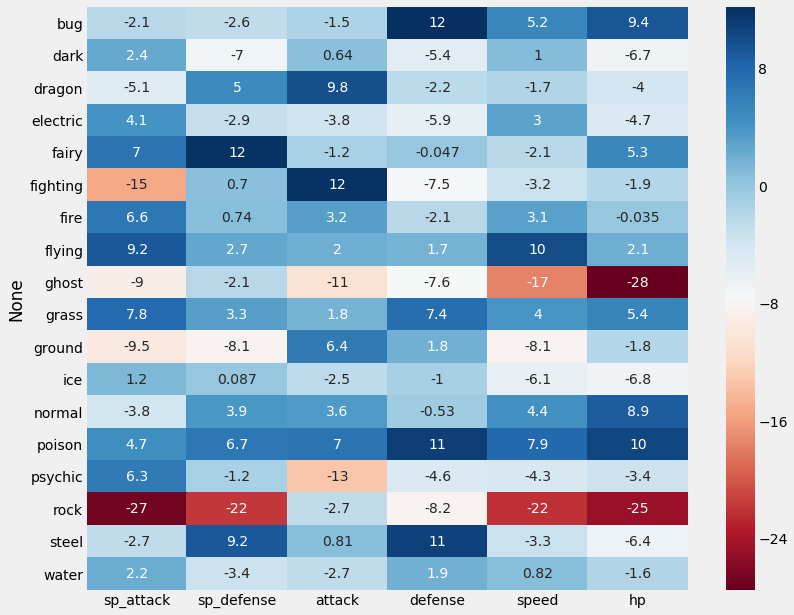

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(coef_df, ax =ax , cmap = "RdBu", annot=True)

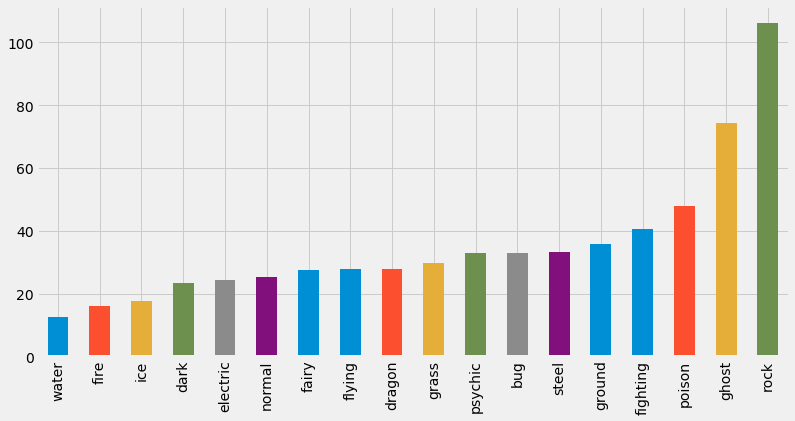

In [116]:
pd.Series(np.abs(lda.coef_).sum(axis = 1), index = lda.classes_).sort_values().plot.bar(figsize =(12,6))

In [117]:
lda.explained_variance_ratio_

array([0.48036548, 0.21001446, 0.13047873])

In [118]:
X_lda = lda.fit_transform(X, y)
lda.explained_variance_ratio_

array([0.53031462, 0.20191011, 0.11069559])

In [119]:
X_lda.shape

(384, 3)

In [120]:
df1["LD1"] = X_lda[:,0]
df1["LD2"] = X_lda[:,1]
df1["LD3"] = X_lda[:,2]

In [121]:
df1.head()

,sp_attack,sp_defense,attack,defense,speed,hp,type1,LD1,LD2,LD3
3,60,50,52,43,65,39,fire,0.577228,0.328334,-0.700553
4,80,65,64,58,80,58,fire,0.918202,0.398252,-0.429124
6,50,64,48,65,43,44,water,0.213526,-0.804571,0.039343
7,65,80,63,80,58,59,water,0.295509,-0.752534,0.321910
8,135,115,103,120,78,79,water,1.588498,-1.598401,0.073403


#### Two factor LDA


In [3]:
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

In [4]:
df.head()

,var,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.describe()

,var,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
from collections import Counter
Counter(df["class"])

Counter({0: 762, 1: 610})

In [7]:
X = df.loc[:, df.columns != "class"]
y = df.loc[:, df.columns == "class"]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


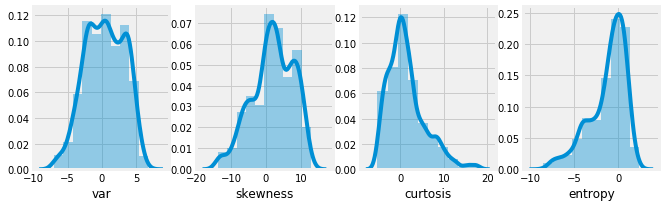

In [8]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
sns.distplot(df["var"],bins=10, ax= ax[0])
sns.distplot(df["skewness"],bins=10, ax=ax[1])
sns.distplot(df["curtosis"],bins=10, ax= ax[2])
sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')

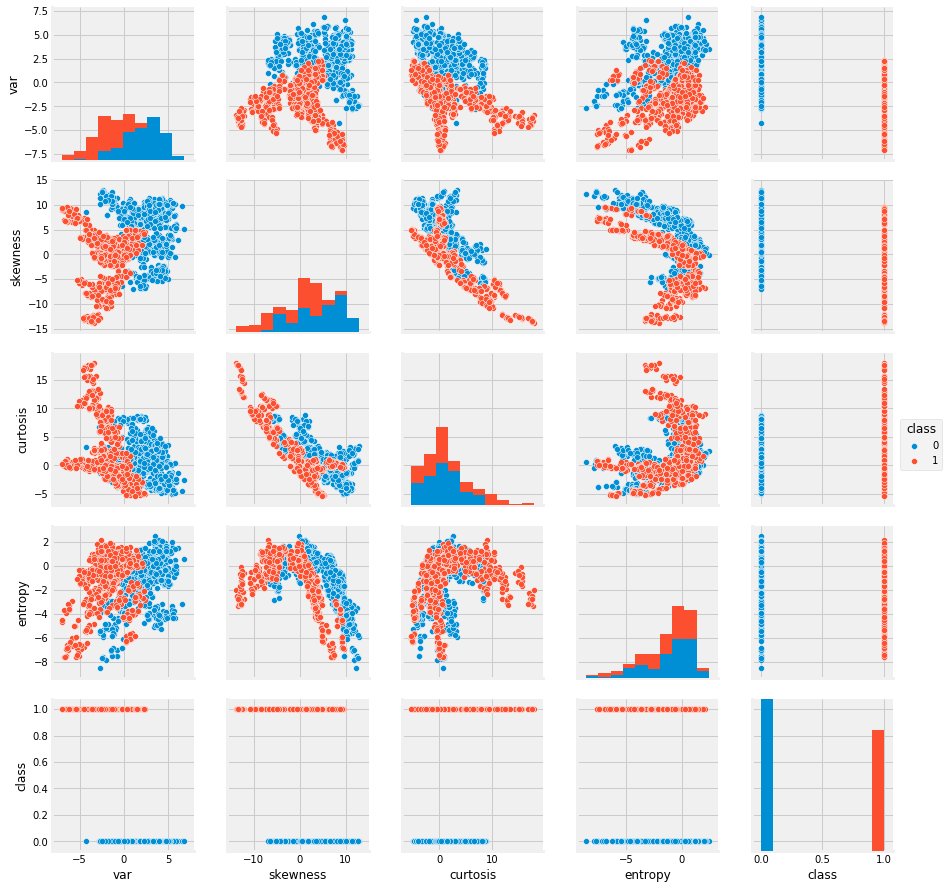

In [9]:
vis1 = sns.pairplot(df,hue = "class")

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=3)
X_lda = lda.fit_transform(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
df["LDA1"] = X_lda[:, 0]

In [12]:
df.head()

,var,skewness,curtosis,entropy,class,LDA1
0,3.62160,8.6661,-2.8073,-0.44699,0,-3.269657
1,4.54590,8.1674,-2.4586,-1.46210,0,-4.018789
2,3.86600,-2.6383,1.9242,0.10645,0,-1.098817
3,3.45660,9.5228,-4.0112,-3.59440,0,-2.791515
4,0.32924,-4.4552,4.5718,-0.98880,0,1.126767


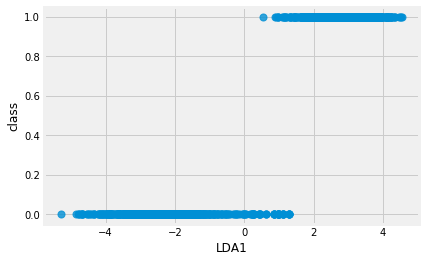

In [13]:
sns.regplot(data = df[["LDA1","class"]], x = "LDA1",y = "class", fit_reg=False, scatter_kws = {'s':50} )

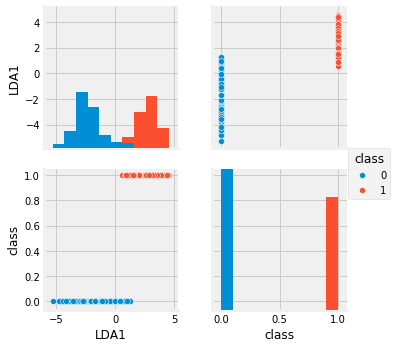

In [14]:
sns.pairplot(df[["LDA1","class"]], hue="class")

In [15]:
lda.n_components

3

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [41]:
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lin_reg = LogisticRegression()

In [44]:
lin_reg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = lin_reg.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

In [47]:
confusion_matrix(y_test, y_pred)

array([[154,   3],
       [  1, 117]])

In [48]:
accuracy_score(y_test, y_pred)

0.9854545454545455